In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

In [3]:
df = pd.read_csv("housing.csv", header = None, delimiter = r"\s+")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.columns = [
    "CRIM",                                   #per capita crime rate by town
    "ZN",                                     #proportion of residential land zoned for lots over 25.000 sq.ft
    "INDUS",                                  #proportion of non-retail business acres per town
    "CHAS",                                   #Charles river dummy
    "NOX",                                    #nitric oxides concentration (parts per 10 million)
    "RM",                                     #average number of rooms per dwelling
    "AGE",                                    #proportion of owner-occupied units built prior to 1940
    "DIS",                                    #weighted distances to five Boston employment centres
    "RAD",                                    #index of accessibility to radial highways
    "TAX",                                    #full-value property-tax rate per $10,000
    "PTRATIO",                               #pupil-teacher ratio by town
    "B",                                      #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT",                                  #% lower status of the population
    "MEDV"                                    #Median value of owner-occupied homes in $1000's
]
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors = "coerce")

print(df.dtypes)
df.describe()

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


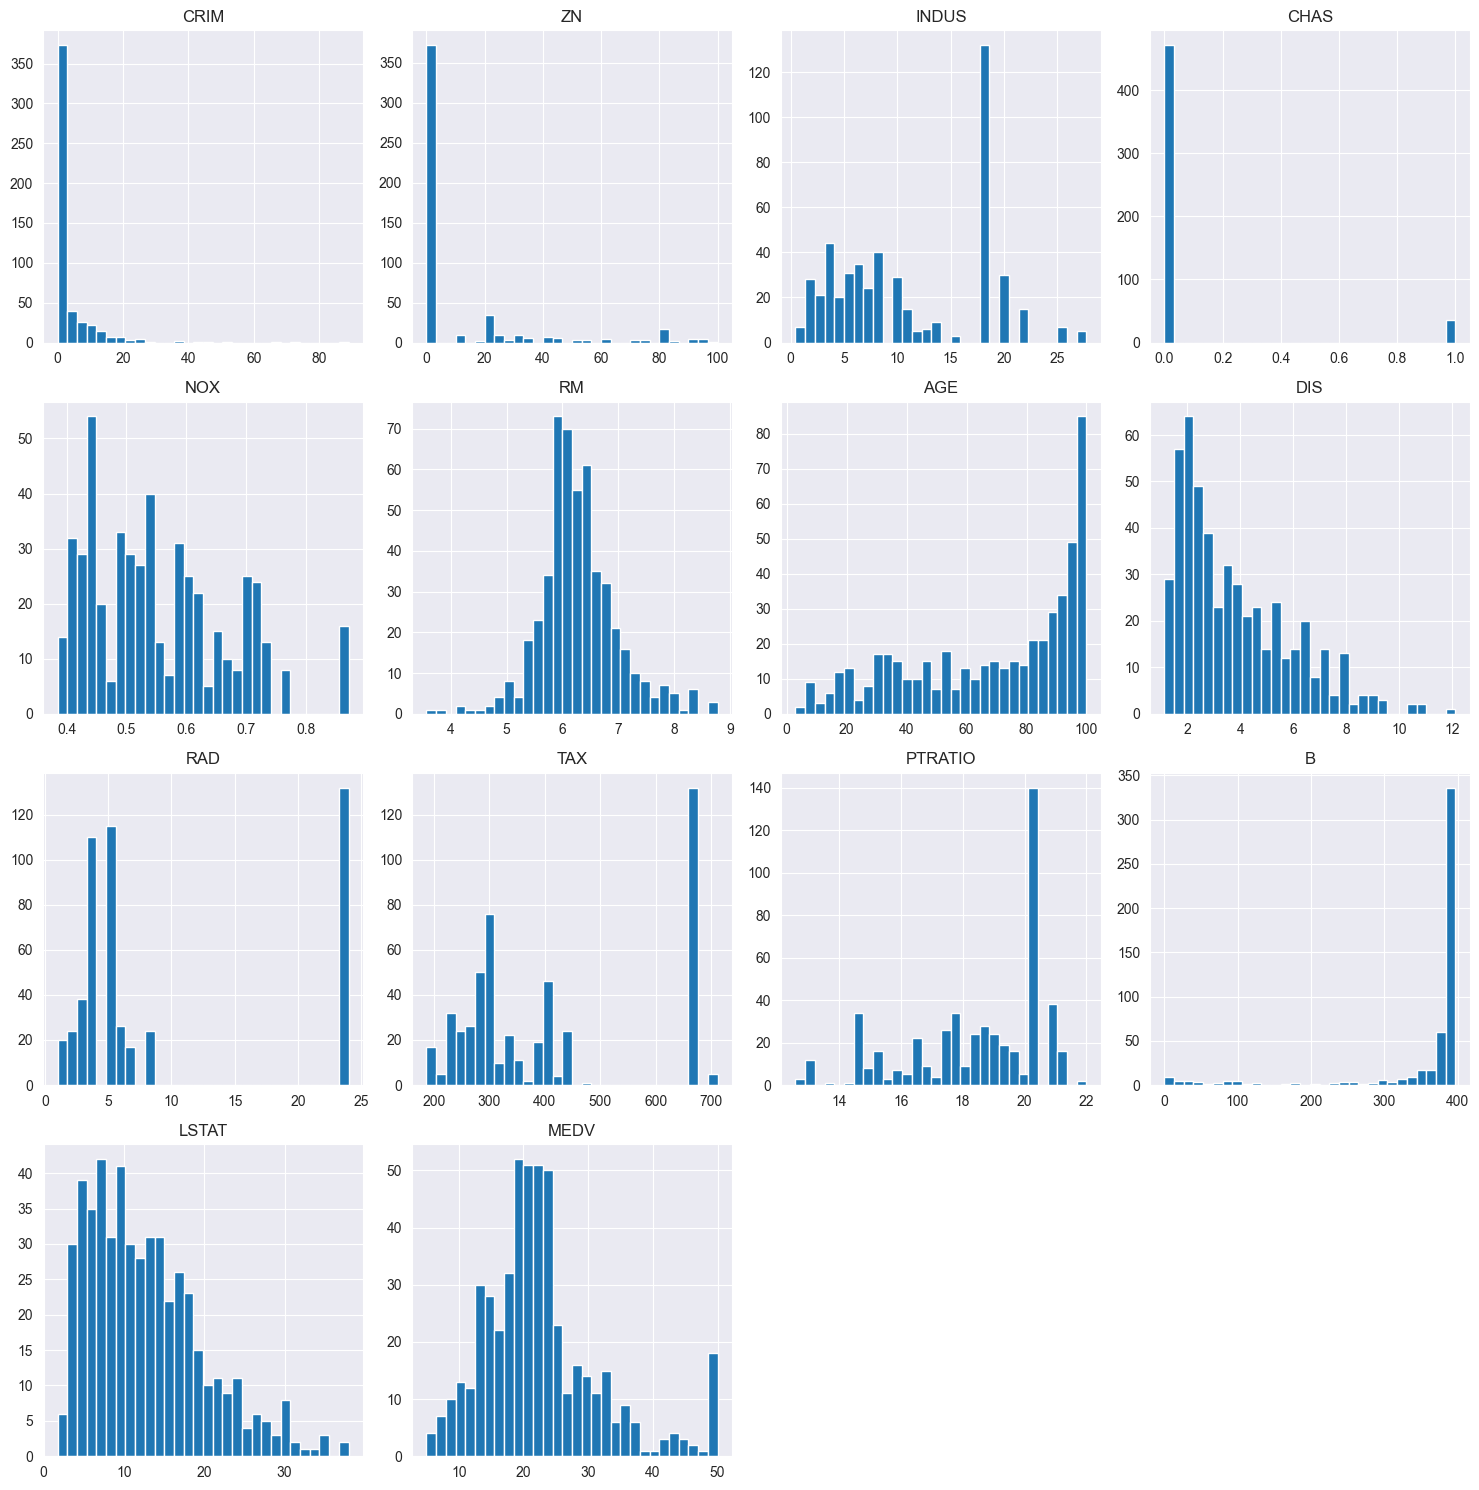

In [9]:
df.hist(bins = 30, figsize = (15,15))
plt.tight_layout()
plt.show()

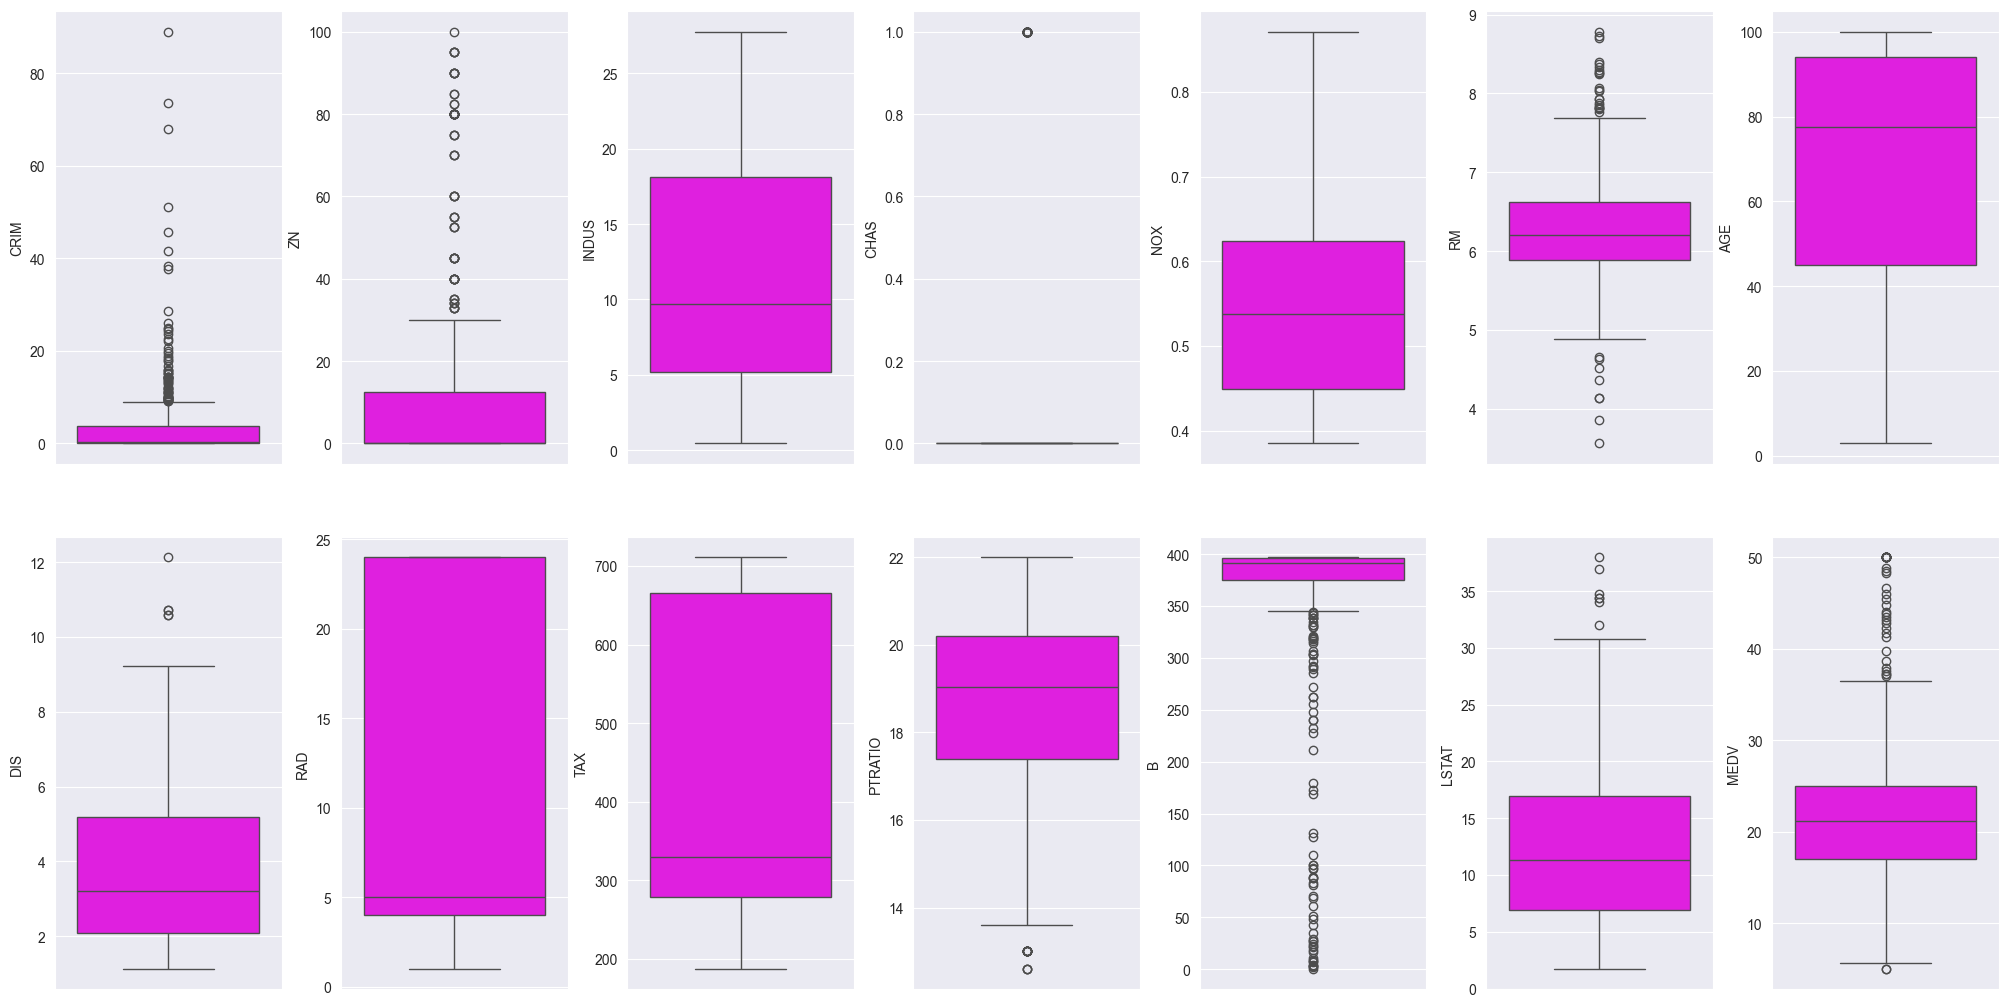

In [10]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color= "magenta")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
df = df[df["MEDV"] != 50]
df.shape

(490, 14)

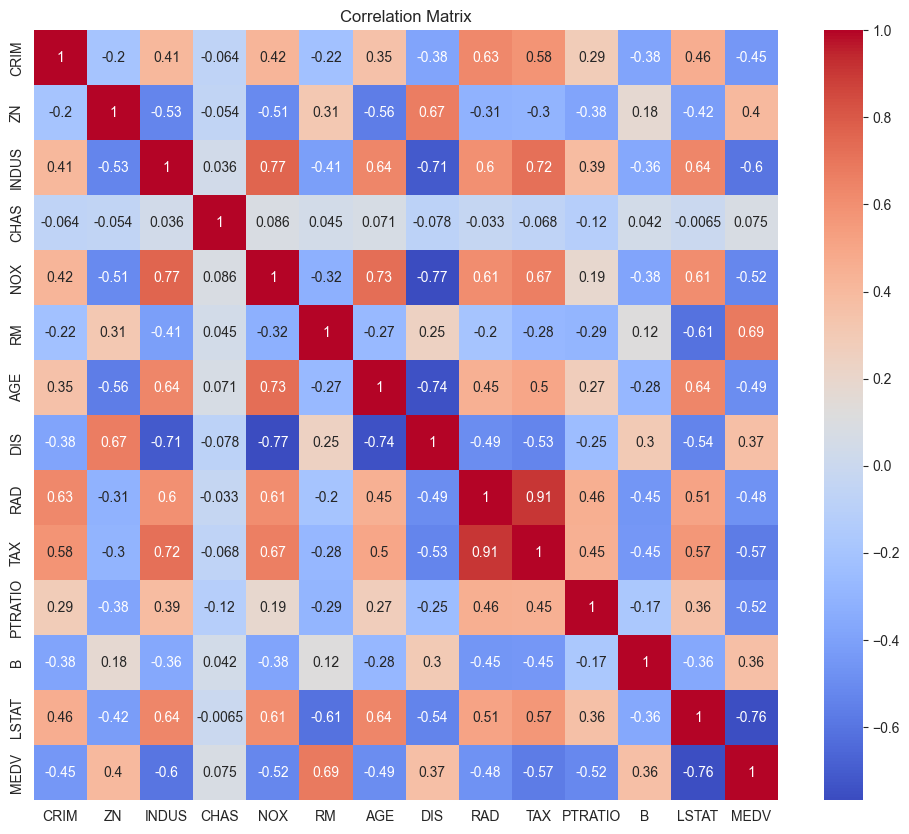

In [12]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

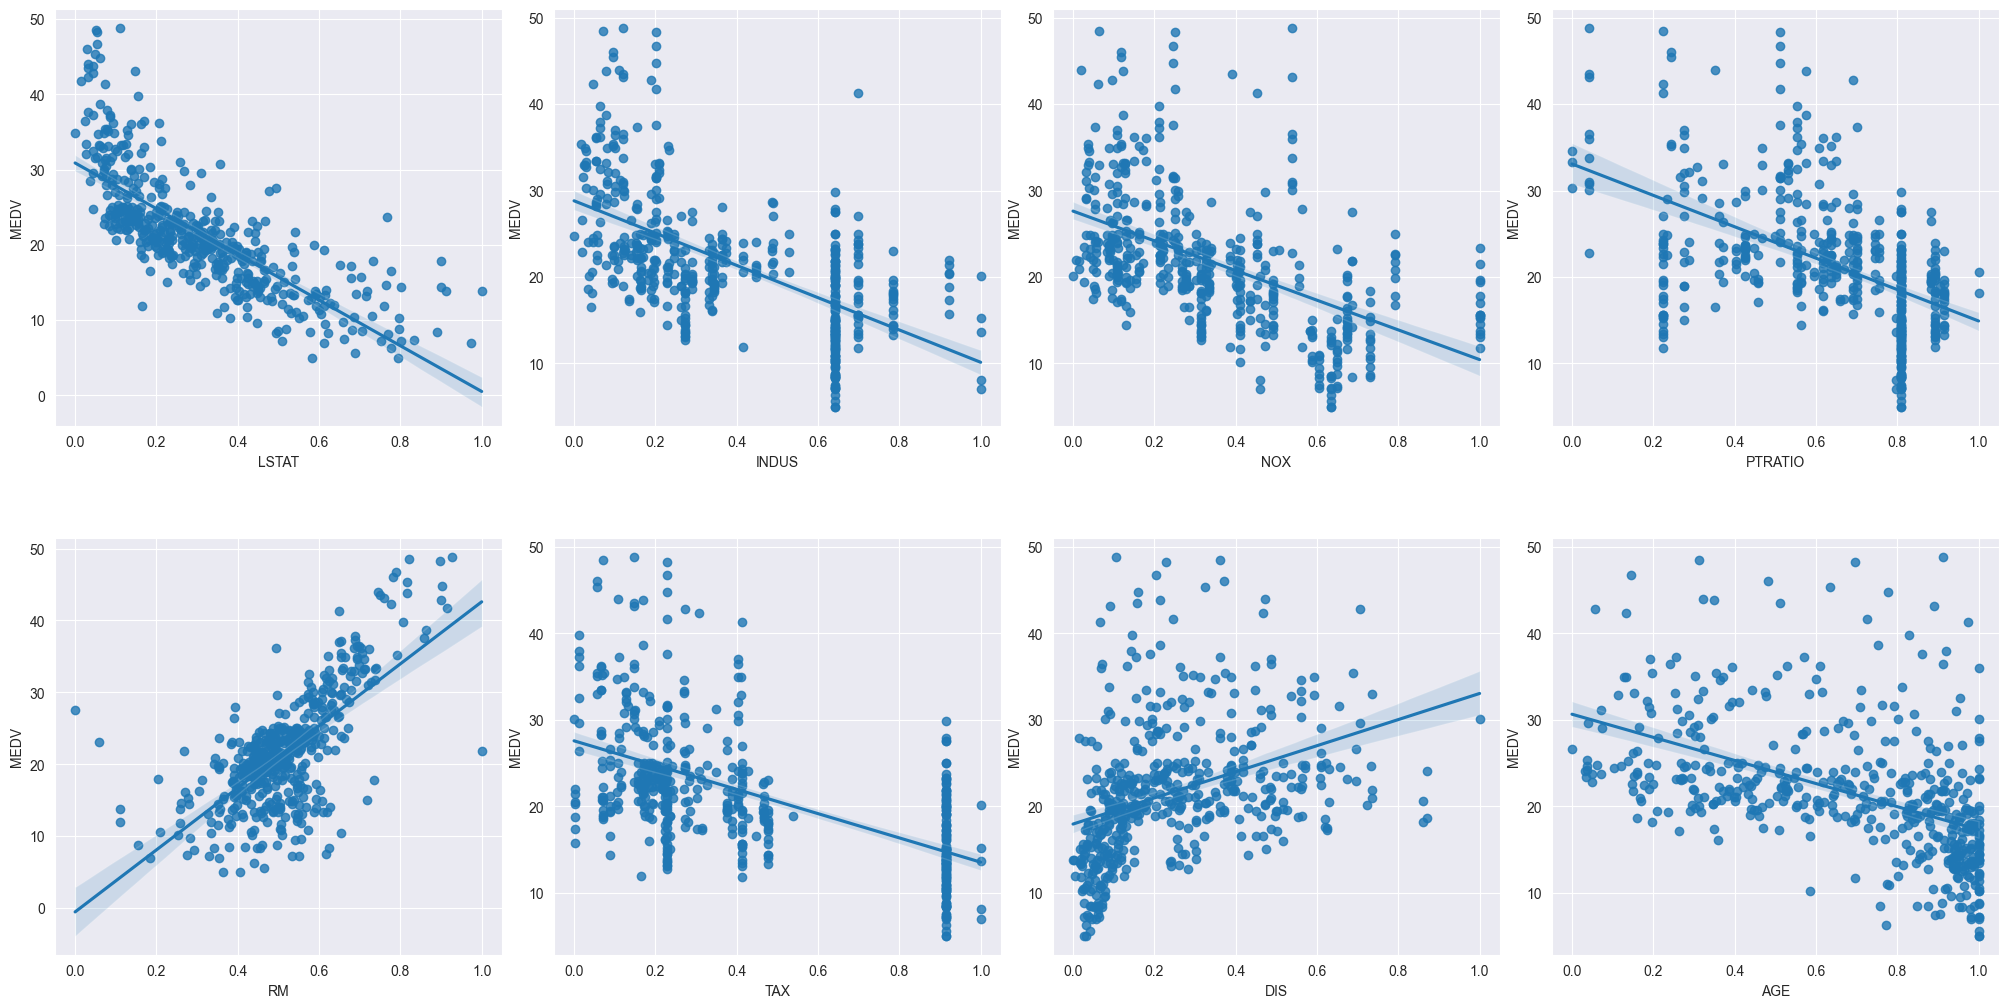

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [14]:
from sklearn.linear_model import LinearRegression
x = df[[c for c in df.columns if c != "MEDV"]]
y = df["MEDV"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

model1 = LinearRegression()
model1.fit(x_train1, y_train1)

y_pred1 = model1.predict(x_test1)
model1_r2score = r2_score(y_test1, y_pred1)
model1_mse = mean_squared_error(y_test1, y_pred1)
print("R²:", model1_r2score)
print("MSE:", model1_mse)

R²: 0.7640047258028567
MSE: 12.055902866387564


In [24]:
from sklearn.linear_model import Ridge

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

param_dist = {
    "ridge__alpha": np.logspace(-4, 4, 100)
}

search_ridge = RandomizedSearchCV(
    pipe_ridge,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
)

search_ridge.fit(x_train2, y_train2)
search_ridge.best_params_["ridge__alpha"] = float(search_ridge.best_params_["ridge__alpha"])
print("Best Ridge Alpha:",search_ridge.best_params_)



Best Ridge Alpha: {'ridge__alpha': 12.328467394420684}


In [26]:
best_ridge = search_ridge.best_estimator_

y_pred2 = best_ridge.predict(x_test2)
model2_r2score = r2_score(y_test2, y_pred2)
model2_mse = mean_squared_error(y_test2, y_pred2)
print("R²:", model2_r2score)
print("MSE:", model2_mse)

R²: 0.7612729738418864
MSE: 12.195455390939431


In [27]:
from sklearn.ensemble import RandomForestRegressor

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

param_dict = {
    "n_estimators": randint(100,500),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": [ "sqrt", "log2"]
}

random_forest = RandomForestRegressor(random_state=42)

search_random_forest = RandomizedSearchCV(
    estimator= random_forest,
    param_distributions= param_dict,
    n_iter= 100,
    cv= 5,
    scoring= "r2",
    n_jobs= -1,
    random_state= 42,
    error_score='raise'
)

search_random_forest.fit(x_train3, y_train3)
print("Best Hyperparameters:", search_random_forest.best_params_)

Best Hyperparameters: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 223}


In [28]:
y_pred3 = search_random_forest.predict(x_test3)
model3_r2score = r2_score(y_test3, y_pred3)
model3_mse = mean_squared_error(y_test3, y_pred3)
print("R2 score:", model3_r2score)
print("MSE:", model3_mse)

R2 score: 0.8820517438586793
MSE: 6.025428789356559


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

x_train4, x_test4, y_train4, y_test4 = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

param_dict = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.3)
}

gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

random_gbr = RandomizedSearchCV(
    estimator= gradient_boosting_regressor,
    param_distributions=param_dict,
    n_iter= 100,
    cv= 5,
    scoring= 'r2',
    n_jobs= -1,
    random_state= 42,
    error_score= np.nan
)

random_gbr.fit(x_train4, y_train4)
print("Best Hyperparameters:", random_gbr.best_params_)

Best Hyperparameters: {'learning_rate': np.float64(0.0790142496053366), 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 229, 'subsample': np.float64(0.8592803749951409)}
